In [47]:
import pandas as pd
import spotipy
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.model_selection import GridSearchCV
import collections
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
from scipy.stats import mode
import math

from sklearn.metrics import confusion_matrix

In [117]:


df_train = pd.read_csv('full_drop-2.csv',encoding='ISO-8859-1')

df_train.head()
print("No of tracks extracted:",len(df_train))

No of tracks extracted: 40572


In [69]:

df_train.drop('MSD_track_id',axis=1, inplace=True)
print(df_train.columns)

Index(['track', 'artist', 'genre', 'Spotify ID', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'keytrack',
       'liveness', 'loudnesstrack', 'modetrack', 'speechiness', 'tempotrack',
       'time_signaturetrack', 'valence', 'avg_timbre1', 'avg_timbre2',
       'avg_timbre3', 'avg_timbre4', 'avg_timbre5', 'avg_timbre6',
       'avg_timbre7', 'avg_timbre8', 'avg_timbre9', 'avg_timbre10',
       'avg_timbre11', 'avg_timbre12', 'var_timbre1', 'var_timbre2',
       'var_timbre3', 'var_timbre4', 'var_timbre5', 'var_timbre6',
       'var_timbre7', 'var_timbre8', 'var_timbre9', 'var_timbre10',
       'var_timbre11', 'var_timbre12', 'Unnamed: 42'],
      dtype='object')


In [70]:
df_train.genre.unique()

array(['classic pop and rock', 'punk', 'folk', 'metal', 'jazz and blues',
       'classical'], dtype=object)

In [94]:
df_rock=df_train[df_train.genre=="classic pop and rock"]
df_rock = df_rock.sample(frac=1).reset_index(drop=True)
df_rock=df_rock[:10000]

df_train = df_train[df_train.genre!="classic pop and rock"]
# df_folk=df_train[df_train.genre=="folk"]

# df_folk = df_folk.sample(frac=1).reset_index(drop=True)
# df_folk=df_folk[:3700]

# df_punk=df_train[df_train.genre=="punk"]
# df_punk = df_punk.sample(frac=1).reset_index(drop=True)
# df_punk=df_punk[:3700]



In [95]:
df_train=pd.concat([df_rock, df_train], ignore_index=True)

In [96]:
len(df_train)

26677

The initial process subsets only the features that are necessary for classifying the genre of the track.Here we observe that we use only the spotify features/audio tags and timbral features extracted from MSD.

features_x df contains all the features that is used for classification of genre

In [97]:
#Subsetting only the required audio features
features_x=df_train.loc[:, 'acousticness':'var_timbre12']
print(features_x.head())

   acousticness  danceability  duration_ms  energy  instrumentalness  \
0       0.01890         0.773       278547   0.740           0.00007   
1       0.66600         0.502       227267   0.279           0.00000   
2       0.14900         0.593       265707   0.548           0.00002   
3       0.00758         0.552       160000   0.824           0.31800   
4       0.01130         0.143       197379   0.968           0.62600   

   keytrack  liveness  loudnesstrack  modetrack  speechiness      ...       \
0         2    0.0598         -4.426          1       0.0371      ...        
1         5    0.1210        -13.301          1       0.0269      ...        
2         5    0.1840        -11.977          1       0.0400      ...        
3        10    0.3870         -9.279          0       0.0486      ...        
4         8    0.5610         -1.851          1       0.1550      ...        

   var_timbre3  var_timbre4  var_timbre5  var_timbre6  var_timbre7  \
0   612.386584   641.975068 

features_y contains the output/labels variable that contains the genre information

In [98]:
features_y=df_train.loc[:,'genre']
print(features_y.head())

0    classic pop and rock
1    classic pop and rock
2    classic pop and rock
3    classic pop and rock
4    classic pop and rock
Name: genre, dtype: object


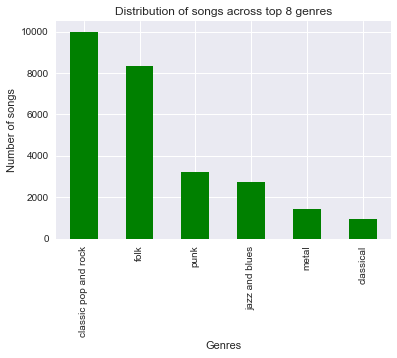

In [99]:


plt.figure(2)
features_y.value_counts().plot(kind='bar', color='green')
plt.title('Distribution of songs across top 8 genres')
plt.xlabel('Genres')
plt.ylabel('Number of songs')
plt.show()

As we observe the data, there is inherent imbalance in music retrieval datasets. This is because; in general, there are some genres of higher popularity and hence have higher number of songs composed. In this project, we will not be focussing on treating this imbalance because that will skew the nature of music dataset and resulting classification algorithm may not work on other generic datsets.

Label Encoder ensures that it gives numerical values to each of the genres so that it can be used as an input to various classifiers.

In [100]:
features_x.isnull().values.any()
#np.where(np.asanyarray(np.isnan(features_x)))[0]# checking for nan

False

In [101]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y=le.fit_transform(features_y)

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(features_x,features_y, test_size=0.25, random_state=42)

In [196]:
from random import choices
l=[]

for i in range(0,len(X_train)):
    l.append(i)
t=(choices(l, k=len(X_train)))

In [197]:
n_samples=int(len(X_train.columns.values)*0.20)

In [198]:
import random
from sklearn.tree import DecisionTreeClassifier
list_choice =[]
train_columns=[]
ypred_train=[]
ypred_test=[]
for i in range(0,100):
    list_choice.append(choices(l, k=len(X_train)))
    train_columns.append(random.sample(set(X_train.columns.values), n_samples))

    R_train = X_train[X_train.columns.intersection(train_columns[i])]
    R_train = R_train.iloc[list_choice[i],]
   
    R_Y_train = Y_train.iloc[list_choice[i],]
    R_test = X_test[X_test.columns.intersection(train_columns[i])]

    DT=DecisionTreeClassifier(random_state=0)
    DT.fit(R_train,R_Y_train)
    ypred_train.append(DT.predict(R_train))
    ypred_test.append(DT.predict(R_test))
    
    

In [199]:
import numpy as np
for i in range(len(ypred_test)):
    ypred_test[i] =le.transform( ypred_test[i].ravel())

for i in range(len(ypred_train)):
    ypred_train[i] =le.transform( ypred_train[i].ravel())    
    

# y_p_train =np.vstack(ypred_train)
# y_p_test


In [200]:
y_p_train =np.vstack(ypred_train)

y_p_test =np.vstack(ypred_test)
y_p_test

array([[0, 0, 2, ..., 0, 0, 1],
       [0, 2, 2, ..., 0, 0, 2],
       [0, 0, 2, ..., 5, 1, 1],
       ...,
       [2, 0, 0, ..., 5, 2, 0],
       [1, 0, 2, ..., 3, 0, 0],
       [2, 2, 2, ..., 0, 0, 5]])

In [201]:
y_pred_train= mode(y_p_train)
y_pred_train=(y_pred_train[0].tolist()[0])
y_pred_test= mode(y_p_test)
y_pred_test=(y_pred_test[0].tolist()[0])

In [202]:
test_error = (len(Y_test)-len([i for i, j in zip(y_pred_test, le.transform(Y_test.tolist())) if i == j]))/len(Y_test)
print("Test Error:",round(test_error*100,3),"%")
print("Test Accuracy:", round((1-test_error)*100,3),"%")

Test Error: 28.186 %
Test Accuracy: 71.814 %


In [ ]:
def cross_val(k,depth,D_train):
    splits = int(len(X_train)/5)
    list_df = [X_train[i:i+splits] for i in range(0,X_train.shape[0],splits)]
    list_df_y = [Y_train[i:i+splits] for i in range(0,Y_train.shape[0],splits)]
    list_choice =[]
    train_columns=[]
    ypred_train=[]
    ypred_val=[]
    splits = int(len(D_train)/5)
    sum_errors=0
    for j in range(0,len(list_df)-1):
   
        list_train = list_df[:j] + list_df[j+1:]
        D_val_train = pd.concat(list_train)
        D_val_train.reset_index(drop=True,inplace=True)
        list_train_y = list_df_y[:j] + list_df_y[j+1:]
        D_val_train_y = pd.concat(list_train_y)
        D_val_train_y.reset_index(drop=True,inplace=True)
        D_val = list_df[j]
        Y_val = list_df_y[j]
        l=[]
        for z in range(0,len(D_val_train)):
                l.append(z)
        for i in range(0,100):
        
                list_choice.append(choices(l, k=len(D_val_train)))
                train_columns.append(random.sample(set(D_val_train.columns.values), n_samples))
               
                R_train = D_val_train[D_val_train.columns.intersection(train_columns[i])]
                R_train = R_train.iloc[list_choice[i],]

                R_Y_train = D_val_train_y.iloc[list_choice[i],]
                R_test = D_val[D_val.columns.intersection(train_columns[i])]

                DT=DecisionTreeClassifier(random_state=0,max_depth = depth)
                DT.fit(R_train,R_Y_train)
                
                ypred_val.append(DT.predict(R_test))
        
        y_p_val=np.vstack(ypred_val)
        y_pred_val= mode(y_p_val)
        y_pred_val=(y_pred_val[0].tolist()[0])
        test_error = (len(D_val)-len([i for i, j in zip(y_pred_val, Y_val.tolist()) if i == j]))/len(Y_val)
        sum_errors += test_error
    
    return sum_errors/k
min_error = math.inf
max_depth =2
for depth in range(2,11):
    
    error =cross_val(5,depth,X_train)
    if error < min_error:
        min_error = error
        max_depth = depth
print("Best max depth:",max_depth,"Corresponding error:",min_error)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


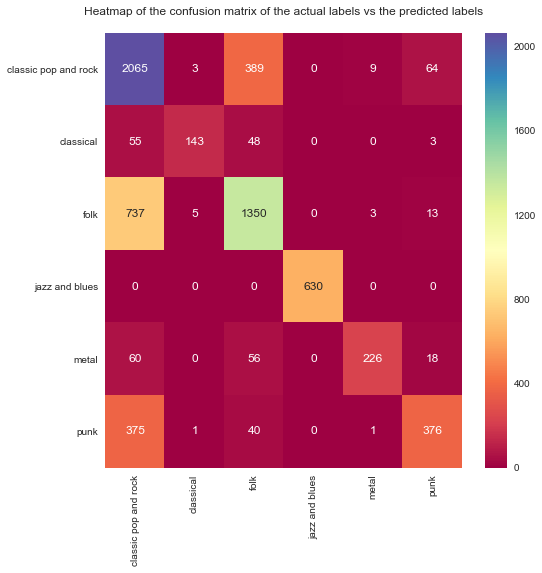

In [208]:
plt.figure(num=None, figsize=(8, 8))
cm = confusion_matrix(le.transform(Y_test.tolist()),y_pred_test, labels=[0,1,2,3,4,5])
df_cm = pd.DataFrame(cm, index=list(le.inverse_transform([0,1,2,3,4,5])), columns=list(le.inverse_transform([0,1,2,3,4,5])))
ax = sns.heatmap(df_cm,annot = True, cmap="Spectral", fmt="d")
ax.set_title('Heatmap of the confusion matrix of the actual labels vs the predicted labels\n')
plt.yticks(rotation=0) 

plt.show()

In [119]:
# # Subset/feature selection
# from sklearn.linear_model import Lasso


# alpha = 0.1
# lasso = Lasso(alpha=alpha,random_state=0)

# y_pred_lasso = lasso.fit(X_train, le.transform(Y_train)).predict(X_test)# predict on X_test ???

# print(lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)


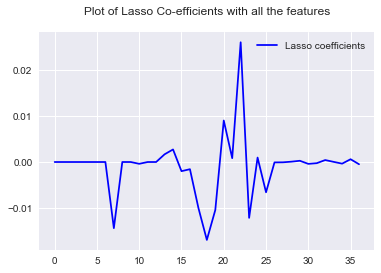

In [120]:
# plt.plot(lasso.coef_, color='blue',
#          label='Lasso coefficients')

# plt.legend(loc='best')
# plt.title('Plot of Lasso Co-efficients with all the features\n')
# plt.show()

In [121]:
# coefficient_list = list(lasso.coef_)
# count = 0
# selected_features =[]
# for i in enumerate(features_x.columns):
#      if abs(coefficient_list[i[0]])>0.001:#keeping threshold as 0.001 for selecting features
#             count += 1
#             selected_features.append(i[1])
#             print(i)
#             print(coefficient_list[i[0]])
# print("Features:",count)

(7, 'loudnesstrack')
-0.014317596795775048
(13, 'avg_timbre1')
0.001667236031754011
(14, 'avg_timbre2')
0.0027197620477392333
(15, 'avg_timbre3')
-0.001979743227449755
(16, 'avg_timbre4')
-0.001553773204240096
(17, 'avg_timbre5')
-0.009927643134565982
(18, 'avg_timbre6')
-0.016861145291590288
(19, 'avg_timbre7')
-0.010378807831525791
(20, 'avg_timbre8')
0.00898776734632132
(22, 'avg_timbre10')
0.025924945872814856
(23, 'avg_timbre11')
-0.012093126098356404
(25, 'var_timbre1')
-0.006550490086586136
Features: 12


In [129]:
# X_selected_df = features_x[selected_features]

In [130]:
#X_train_selected, X_test_selected,Y_train_selected, Y_test_selected = train_test_split(X_selected_df,features_y, test_size=0.25)

In [131]:
# from random import choices
# l=[]

# for i in range(0,len(X_train_selected)):
#     l.append(i)
# t=(choices(l, k=len(X_train_selected)))
# n_samples=int(len(X_train_selected.columns.values)*0.20)

In [132]:
# import random
# from sklearn.tree import DecisionTreeClassifier
# list_choice =[]
# train_columns=[]
# ypred_train=[]
# ypred_test=[]
# for i in range(0,100):
#     list_choice.append(choices(l, k=len(X_train_selected)))
#     train_columns.append(random.sample(set(X_train_selected.columns.values), n_samples))

#     R_train = X_train_selected[X_train_selected.columns.intersection(train_columns[i])]
#     R_train = R_train.iloc[list_choice[i],]
   
#     R_Y_train = Y_train_selected.iloc[list_choice[i],]
#     R_test = X_test_selected[X_test_selected.columns.intersection(train_columns[i])]

#     DT=DecisionTreeClassifier(random_state=0)
#     DT.fit(R_train,R_Y_train)
#     ypred_train.append(DT.predict(R_train))
#     ypred_test.append(DT.predict(R_test))
    

In [133]:
# import numpy as np
# for i in range(len(ypred_test)):
#     ypred_test[i] =le.transform( ypred_test[i].ravel())

# for i in range(len(ypred_train)):
#     ypred_train[i] =le.transform( ypred_train[i].ravel())
    
# y_p_train =np.vstack(ypred_train)

# y_p_test =np.vstack(ypred_test)
# y_pred_train= mode(y_p_train)
# y_pred_train=(y_pred_train[0].tolist()[0])
# y_pred_test= mode(y_p_test)
# y_pred_test=(y_pred_test[0].tolist()[0])

In [134]:
# test_error = (len(Y_test)-len([i for i, j in zip(y_pred_test, le.transform(Y_test_selected.tolist())) if i == j]))/len(Y_test)
# print("Test Error:",round(test_error*100,3),"%")
# print("Test Accuracy:", round((1-test_error)*100,3),"%")

Test Error: 42.489 %
Test Accuracy: 57.511 %


In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)
accuracy=clf.score(X_test,Y_test)
print("Accuracy before grid search for selected features:",accuracy)

Accuracy before grid search for selected features: 0.766416791604198


In [160]:
for i in range(len(features_x.columns)):
    print (features_x.columns[i],clf.feature_importances_[i])

acousticness 0.04793943834583142
danceability 0.017827458436794605
duration_ms 0.02179649478830245
energy 0.02824094871663035
instrumentalness 0.04023582800652758
keytrack 0.008126632597990574
liveness 0.014378420118341347
loudnesstrack 0.024158672794939468
modetrack 0.002201829336612212
speechiness 0.018864106118633386
tempotrack 0.013535961846947529
time_signaturetrack 0.0024146921242390383
valence 0.026113815216402464
avg_timbre1 0.09341534459700304
avg_timbre2 0.0645661672946634
avg_timbre3 0.02107396633051213
avg_timbre4 0.03169598533834255
avg_timbre5 0.031414191024532245
avg_timbre6 0.026853791286455552
avg_timbre7 0.01954444591344816
avg_timbre8 0.02128062545184864
avg_timbre9 0.018087283080636837
avg_timbre10 0.026261564701655346
avg_timbre11 0.016927598047174502
avg_timbre12 0.021655845261019702
var_timbre1 0.04104958072828244
var_timbre2 0.09145270592518288
var_timbre3 0.021328853350615615
var_timbre4 0.01919501028854104
var_timbre5 0.02245513096486109
var_timbre6 0.01731998

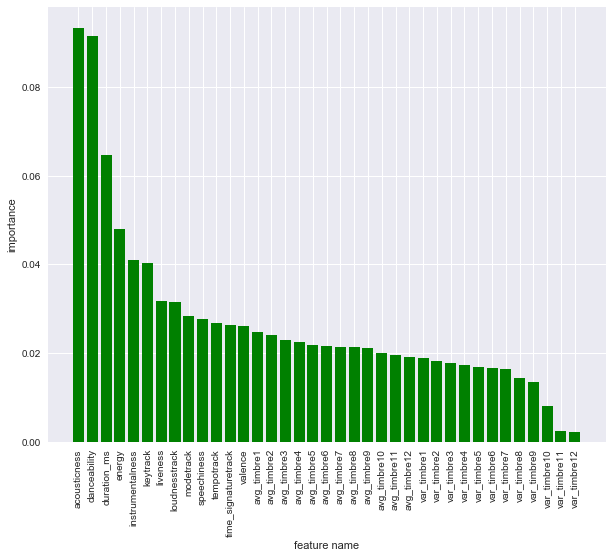

In [189]:
importance_f = clf.feature_importances_
indices = np.argsort(importance_f)[::-1]

plt.figure(figsize=(10,8))
plt.bar(range(X_train.shape[1]), importance_f[indices],
    color="g", 
    align="center")
feature_names = features_x.columns 
plt.xticks(range(X_train.shape[1]), feature_names,rotation=90)

plt.ylabel("importance")
plt.xlabel("feature name")
plt.show()